In [1]:
pip install python-mnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
from mnist import MNIST
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = MNIST("D:\PDFs\Edvancer Eduventures\Certified Deep Learning Expert\Download Data\mnist_data")

In [4]:
images_test, labels_test = mnist.load_testing()
images_train, labels_train = mnist.load_training()

In [5]:
len(images_test), len(images_train)

(10000, 60000)

In [6]:
len(images_train[0])

784

In [7]:
len(labels_train)

60000

In [8]:
labels_train[:4]

array('B', [5, 0, 4, 1])

In [9]:
labels_test = np.array(labels_test).reshape(-1,1)
labels_train = np.array(labels_train).reshape(-1,1)

In [10]:
labels_train.shape

(60000, 1)

In [11]:
labels_train[:4]

array([[5],
       [0],
       [4],
       [1]], dtype=uint8)

In [12]:
onehot = OneHotEncoder()

onehot.fit(labels_train)

labels_test = onehot.transform(labels_test)
labels_train = onehot.transform(labels_train)

labels_test = labels_test.toarray()
labels_train = labels_train.toarray()

In [13]:
labels_train.shape

(60000, 10)

In [14]:
labels_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
images_train=np.array(images_train).reshape(60000,784)/255
images_test=np.array(images_test).reshape(10000,784)/255

images_train=images_train.reshape(60000,  28, 28,1).astype('float32')
images_test=images_test.reshape(10000, 28, 28,1).astype('float32')

In [16]:
def show_image(data_x, data_y, idx):
    sample_image = data_x[idx,:,:,:]
    pixels = sample_image.reshape((28, 28))
    plt.imshow(pixels, cmap = 'gray')
    plt.show()
    print('real label:', np.argmax(data_y[idx]))

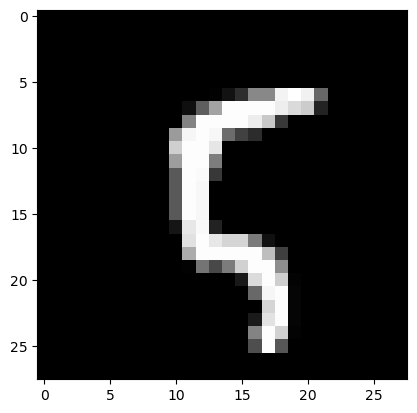

real label: 5


In [17]:
show_image(images_train, labels_train, 100)

# Model Building

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input

In [19]:
x = Input(shape = (28, 28, 1))

conv1 = Conv2D(32, (5, 5), activation = 'relu', padding = 'same', name = 'conv1')(x)
pool1 = MaxPooling2D(pool_size = (2, 2), name = 'pool1')(conv1)

conv2 = Conv2D(64, (5, 5), activation = 'relu', padding = 'same', name = 'conv2')(pool1)
pool2 = MaxPooling2D(pool_size = (2, 2), name = 'pool2')(conv2)

flat = Flatten(name = 'flat')(pool2)

dense1 = Dense(1024, activation = 'relu', name = 'dense1')(flat)
bn1 = BatchNormalization(name = 'bn_dense1')(dense1)
dr1 = Dropout(0.2, name = 'dr1')(bn1)

dense2 = Dense(200, activation = 'relu', name = 'dense2')(dr1)
bn2 = BatchNormalization(name = 'bn_dense2')(dense2)
dr2 = Dropout(0.2, name = 'dr2')(bn2)

output = Dense(10, activation = 'softmax')(dr2)

model = Model(inputs = x, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flat (Flatten)                       │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_dense1 (BatchNormalization)       │ (None, 1024)                │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dr1 (Dropout)                        │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_dense2 (BatchNormalization)       │ (None, 200)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dr2 (Dropout)                        │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,476,290 (13.26 MB)

 Trainable params: 3,473,842 (13.25 MB)

 Non-trainable params: 2,448 (9.56 KB)

In [21]:
from tensorflow.keras.utils import plot_model

In [22]:
#plot_model(model)

In [23]:
model.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=8, batch_size=200, verbose=1)

Epoch 1/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9279 - loss: 0.2375 - val_accuracy: 0.9787 - val_loss: 0.1962
Epoch 2/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.9888 - loss: 0.0384 - val_accuracy: 0.9819 - val_loss: 0.0552
Epoch 3/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9876 - val_loss: 0.0376
Epoch 4/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9902 - val_loss: 0.0308
Epoch 5/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9906 - val_loss: 0.0264
Epoch 6/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accuracy: 0.9889 - val_loss: 0.0380
Epoch 7/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9920 - val_loss: 0.0277
Epoch 8/8
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - accuracy: 0.9970 - loss: 0.0095 - va

In [24]:
test_probs = model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [25]:
test_probs.shape

(10000, 10)

In [26]:
labels_test_predicted = np.argmax(test_probs, 1)

In [27]:
pd.crosstab(np.argmax(labels_test, axis = 1), labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,0,2,0,0,0,2,1,3,0
1,1,1123,0,3,3,0,1,0,3,1
2,0,1,1025,0,1,0,0,3,2,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,966,0,1,0,2,13
5,0,0,0,6,0,885,1,0,0,0
6,2,2,1,0,0,1,950,0,2,0
7,0,2,15,1,1,0,0,997,2,10
8,1,0,3,1,0,0,0,0,969,0


In [28]:
y_true = np.argmax(labels_test, axis = 1)

In [29]:
(y_true == labels_test_predicted).sum()

9888

In [30]:
a = y_true == labels_test_predicted

c = [i for i, j in enumerate(a) if not j]

c

[115,
 321,
 340,
 445,
 448,
 551,
 582,
 619,
 659,
 684,
 900,
 1014,
 1021,
 1112,
 1226,
 1232,
 1242,
 1260,
 1364,
 1393,
 1414,
 1520,
 1522,
 1527,
 1553,
 1634,
 1691,
 1790,
 1878,
 1901,
 2035,
 2043,
 2053,
 2070,
 2130,
 2135,
 2182,
 2195,
 2293,
 2329,
 2447,
 2488,
 2597,
 2607,
 2654,
 2771,
 2896,
 2939,
 2995,
 3189,
 3225,
 3422,
 3441,
 3474,
 3534,
 3601,
 3718,
 3726,
 3762,
 3808,
 3838,
 4007,
 4078,
 4201,
 4238,
 4256,
 4284,
 4382,
 4487,
 4740,
 4815,
 4823,
 4860,
 5246,
 5457,
 5600,
 5937,
 5955,
 5982,
 6071,
 6081,
 6101,
 6166,
 6173,
 6576,
 6597,
 6625,
 6651,
 6662,
 6783,
 7216,
 7268,
 7902,
 7915,
 7928,
 7978,
 8094,
 8287,
 8316,
 8325,
 8375,
 8376,
 8382,
 9009,
 9015,
 9016,
 9057,
 9538,
 9729,
 9792,
 9839,
 9850]

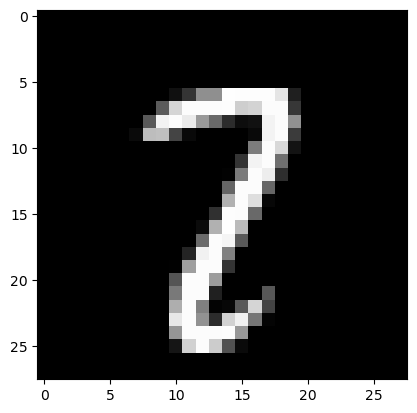

real label: 2
predicted labels is : 7


In [31]:
idx = 321
show_image(images_test, labels_test, idx)
print('predicted labels is :', labels_test_predicted[idx])

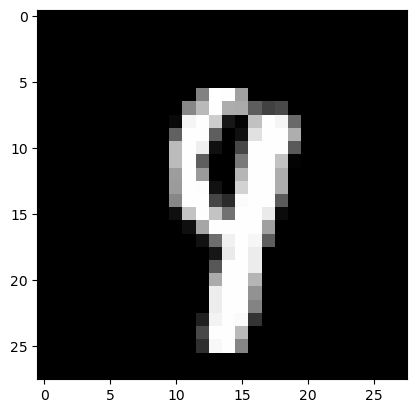

real label: 9
predicted labels is : 9


In [32]:
idx = 2720
show_image(images_test, labels_test, idx)
print('predicted labels is :', labels_test_predicted[idx])

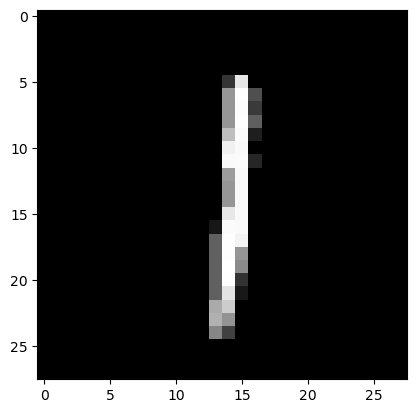

real label: 1
predicted labels is : 1


In [33]:
idx = 504
show_image(images_test, labels_test, idx)
print('predicted labels is :', labels_test_predicted[idx])

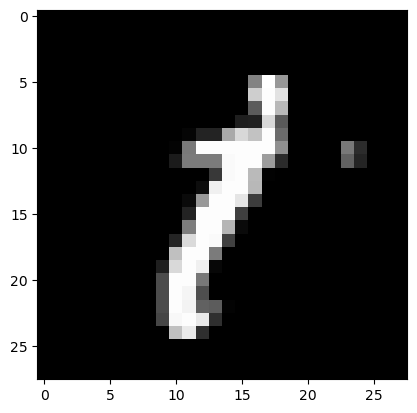

real label: 1
predicted labels is : 1


In [34]:
idx = 9540
show_image(images_test, labels_test, idx)
print('predicted labels is :', labels_test_predicted[idx])

# Extracted Features

In [35]:
conv_layer_1 = Model(inputs = x, outputs = conv1)
pool_layer_1 = Model(inputs = x, outputs = pool1)

conv_layer_2 = Model(inputs = x, outputs = conv2)
pool_layer_2 = Model(inputs = x, outputs = pool2)

flat_layer = Model(inputs = x, outputs = flat)

dense_layer_1 = Model(inputs = x, outputs = dense1)
dense_layer_2 = Model(inputs = x, outputs = dense2)

In [36]:
image_reshaped = images_test[idx].reshape((-1, 28, 28, 1))

In [37]:
conv_layer_1_preds = conv_layer_1.predict(image_reshaped)
pool_layer_1_preds = pool_layer_1.predict(image_reshaped)

conv_layer_2_preds = conv_layer_2.predict(image_reshaped)
pool_layer_2_preds = pool_layer_2.predict(image_reshaped)

flat_layer_preds = flat_layer.predict(image_reshaped)

dense_layer_1_preds = dense_layer_1.predict(image_reshaped)
dense_layer_2_preds = dense_layer_2.predict(image_reshaped)

output_preds = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [38]:
conv_layer_1_preds.shape, pool_layer_1_preds.shape,conv_layer_2_preds.shape, pool_layer_2_preds.shape 

((1, 28, 28, 32), (1, 14, 14, 32), (1, 14, 14, 64), (1, 7, 7, 64))

In [39]:
flat_layer_preds.shape, dense_layer_1_preds.shape, dense_layer_2_preds.shape, output_preds

((1, 3136),
 (1, 1024),
 (1, 200),
 array([[2.2206706e-05, 9.2234492e-01, 2.1629233e-04, 4.9003160e-07,
         2.1119058e-05, 7.3553480e-07, 1.8335513e-06, 2.1196965e-05,
         7.7365182e-02, 6.0658190e-06]], dtype=float32))

In [40]:
conv_layer_1_preds = conv_layer_1_preds.reshape((28, 28, 32))
pool_layer_1_preds = pool_layer_1_preds.reshape((14, 14, 32))


conv_layer_2_preds = conv_layer_2_preds.reshape((14, 14, 64))
pool_layer_2_preds = pool_layer_2_preds.reshape((7, 7, 64))


flat_layer_preds = flat_layer_preds.reshape((3136))

dense_layer_1_preds = dense_layer_1_preds.reshape((1024))
dense_layer_2_preds = dense_layer_2_preds.reshape((200))

output_preds = output_preds.reshape((10))

In [41]:
conv_layer_1_preds.shape, pool_layer_1_preds.shape, conv_layer_2_preds.shape, pool_layer_2_preds.shape

((28, 28, 32), (14, 14, 32), (14, 14, 64), (7, 7, 64))

In [42]:
flat_layer_preds.shape, dense_layer_1_preds.shape, dense_layer_2_preds.shape, output_preds.shape

((3136,), (1024,), (200,), (10,))

<function matplotlib.pyplot.show(close=None, block=None)>

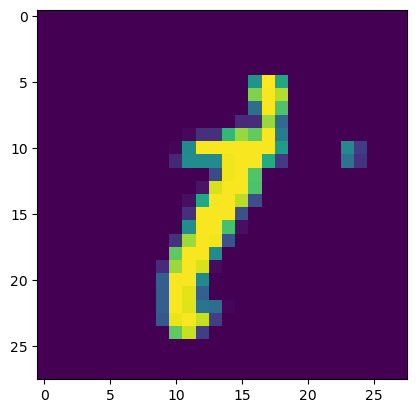

In [43]:
plt.imshow(images_test[idx].reshape((28, 28)))
plt.show

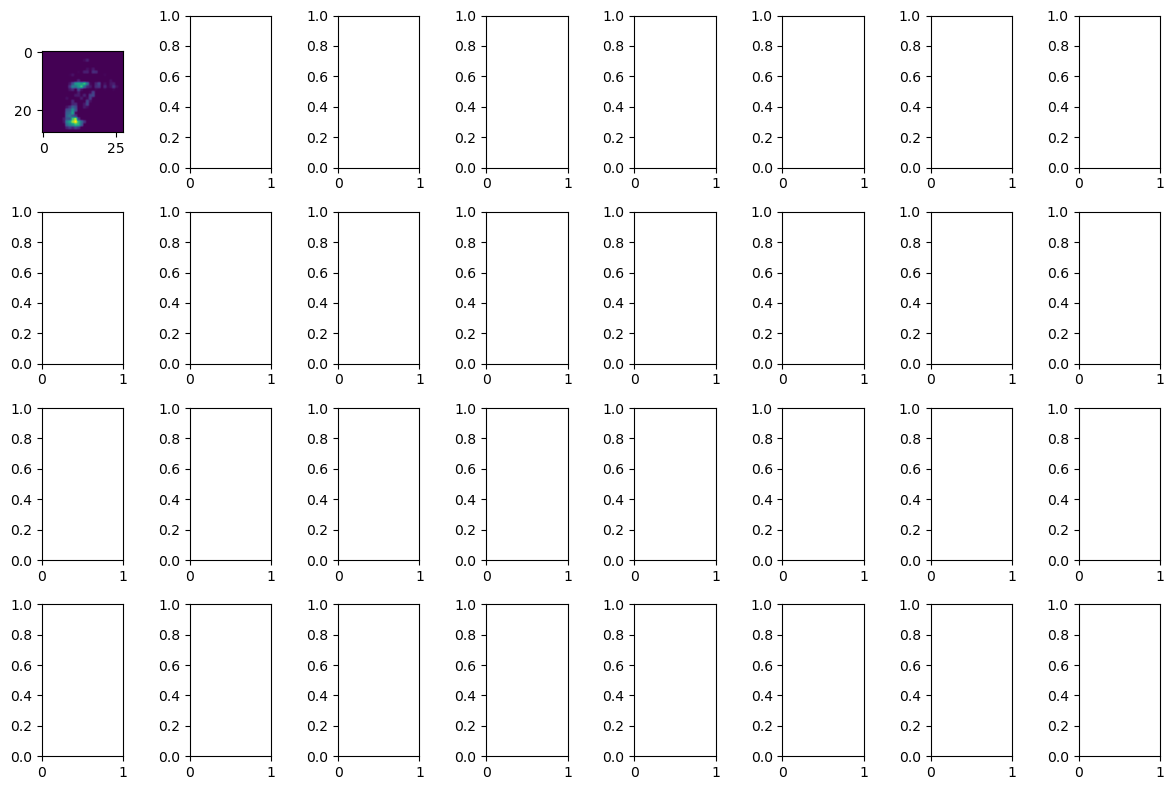

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [44]:
num = 32
num_row = 4
num_col = 8

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(conv_layer_1_preds[:,:,i])
    plt.tight_layout()
    plt.show()

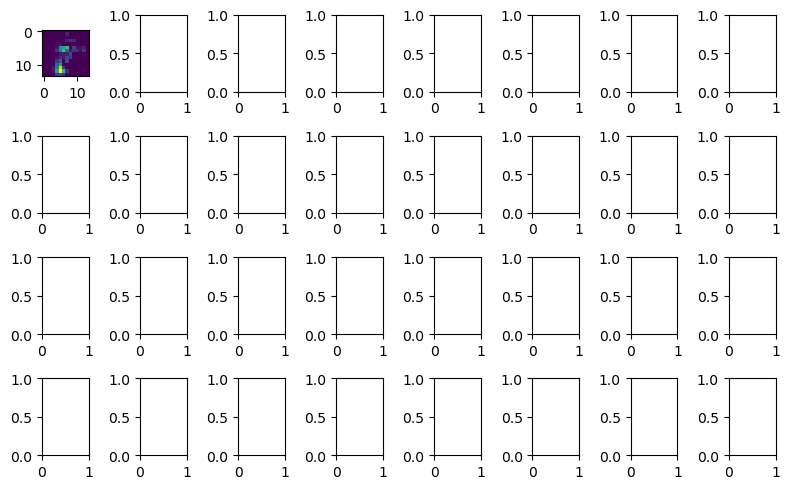

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [45]:
num = 32
num_row = 4
num_col = 8

fig, axes = plt.subplots(num_row, num_col, figsize = (1 * num_col, 1.25 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(pool_layer_1_preds[:,:,i])
    plt.tight_layout()
    plt.show()

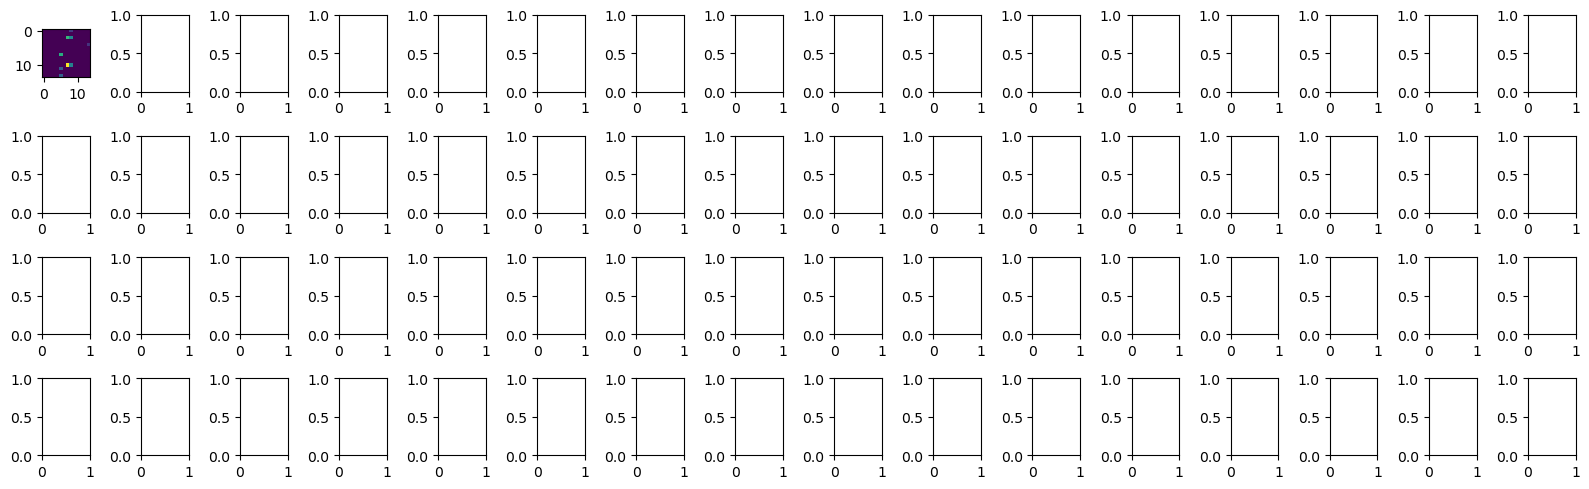

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [46]:
num = 64
num_row = 4
num_col = 16

fig, axes = plt.subplots(num_row, num_col, figsize = (1 * num_col, 1.25 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(conv_layer_2_preds[:,:,i])
    plt.tight_layout()
    plt.show()

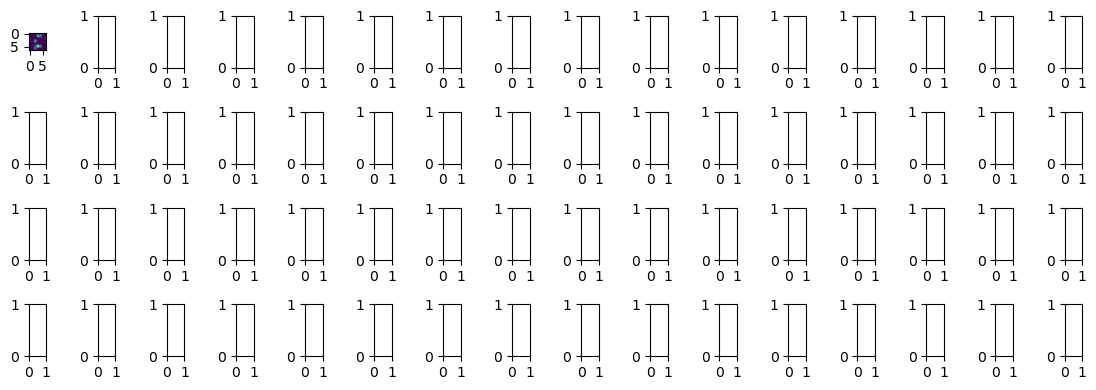

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [47]:
num = 64
num_row = 4
num_col = 16

fig, axes = plt.subplots(num_row, num_col, figsize = (0.7 * num_col, 1 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(pool_layer_2_preds[:,:,i])
    plt.tight_layout()
    plt.show()

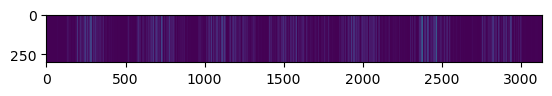

In [48]:
plt.imshow(np.tile(flat_layer_preds,(300, 1)))

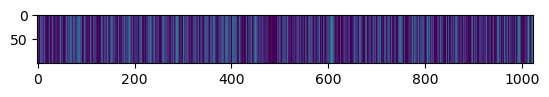

In [49]:
plt.imshow(np.tile(dense_layer_1_preds,(100, 1)))

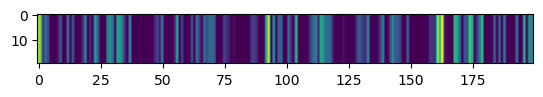

In [50]:
plt.imshow(np.tile(dense_layer_2_preds,(20, 1)))

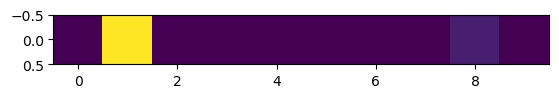

In [51]:
plt.imshow(np.tile(output_preds,(1, 1)))

# Visualising Kernels

In [52]:
conv_1_kernels = model.weights[0]

In [53]:
conv_1_kernels.shape

TensorShape([5, 5, 1, 32])

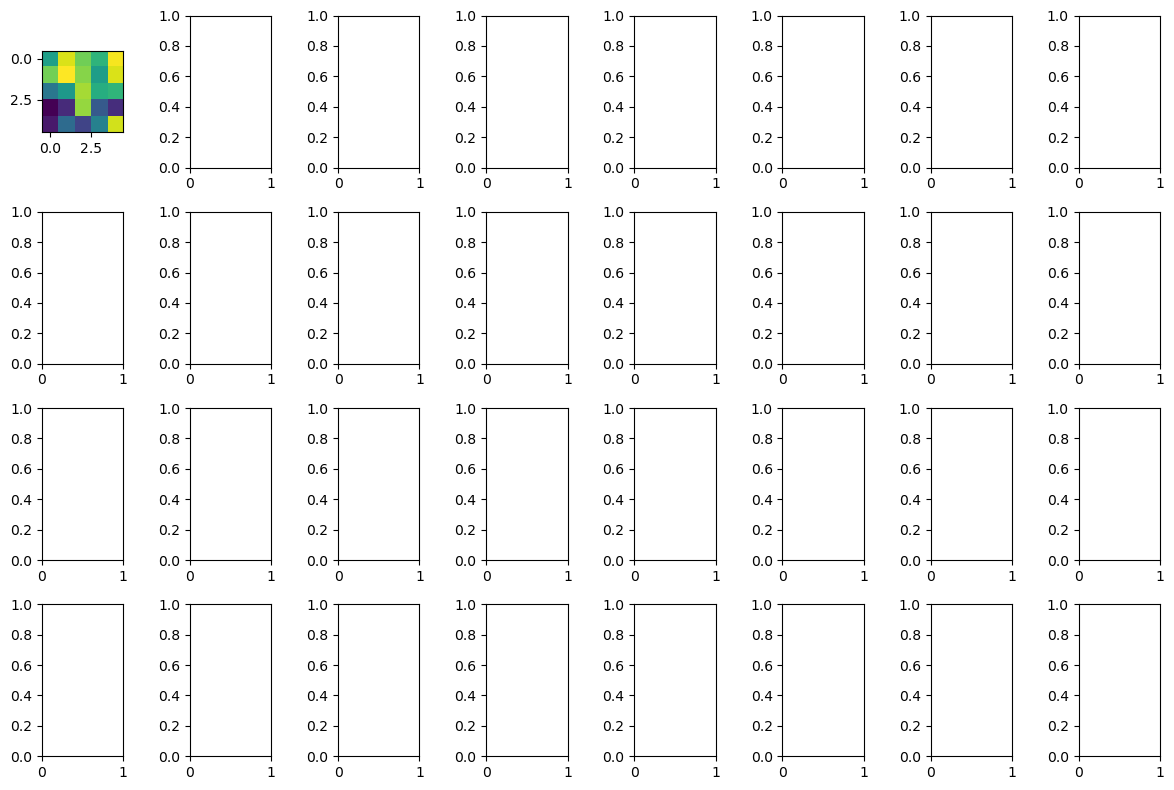

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [54]:
num = 32
num_row = 4
num_col = 8

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(np.array(conv_1_kernels[:,:,:,i]).reshape((5,5)))
    plt.tight_layout()
    plt.show()

In [55]:
conv_2_kernels = model.weights[2]

In [56]:
conv_2_kernels.shape

TensorShape([5, 5, 32, 64])

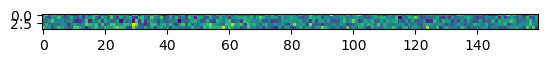

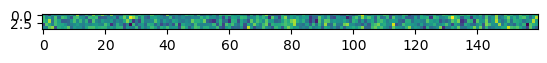

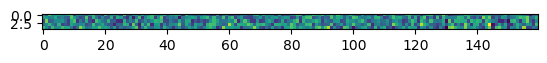

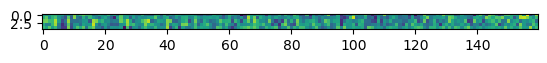

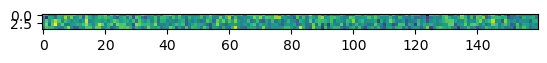

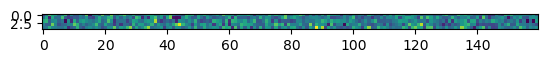

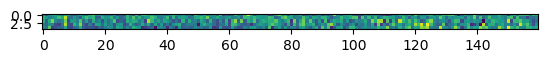

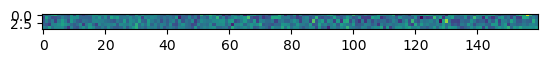

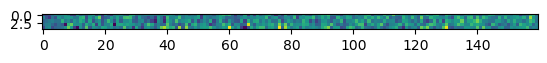

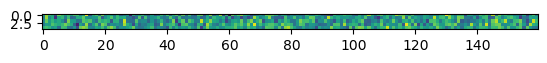

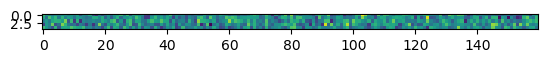

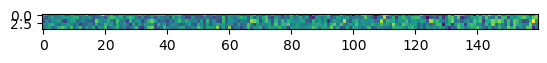

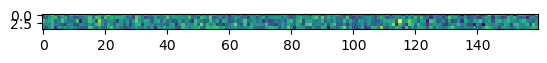

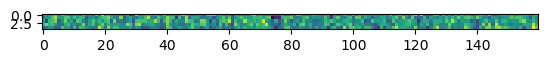

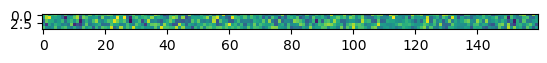

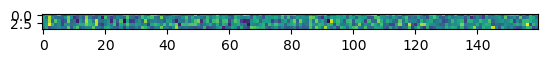

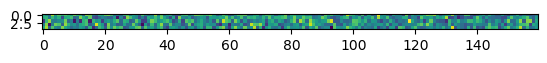

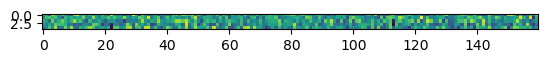

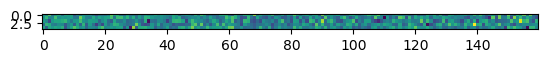

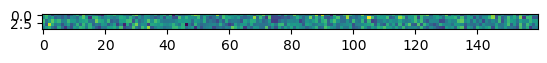

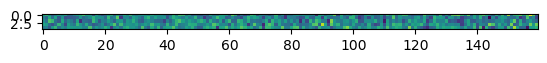

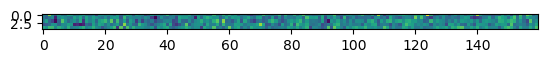

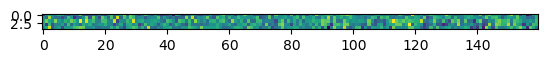

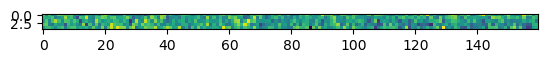

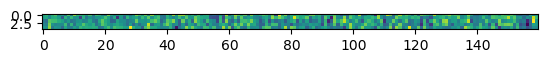

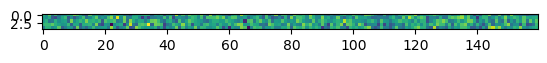

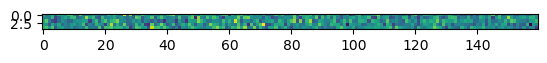

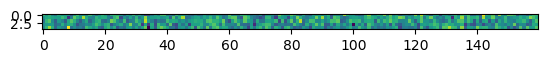

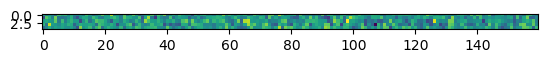

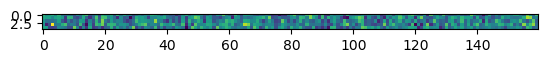

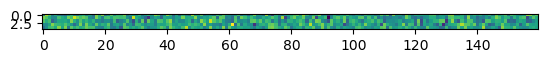

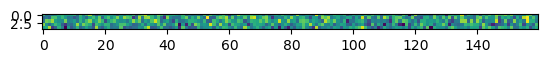

In [57]:
num = 32

for i in range(num):
    
    plt.imshow(np.array(conv_2_kernels[:,:,:,i]).reshape((5, 5 * 32)))
    plt.show()